<a href="https://colab.research.google.com/github/jungmin0710/AI_excercise/blob/main/PriceAnalysis_phone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##중고 핸드폰 가격분석##
create_date : 판매글 올라온 날짜

price : 판매 가격

text : 게시글

phone_model : 휴대폰 기종

factory_price : 원래 가격

maker : 휴대폰 제조사

price_index : 판매글 올라온 시점의 물가 지수



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("used_mobile_phone.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4951 entries, 0 to 4950
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   create_date    4951 non-null   object 
 1   price          4951 non-null   float64
 2   text           4951 non-null   object 
 3   phone_model    4951 non-null   object 
 4   factory_price  4951 non-null   int64  
 5   maker          4951 non-null   object 
 6   price_index    4951 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 270.9+ KB
None


In [ ]:
df.head()

,create_date,price,text,phone_model,factory_price,maker,price_index
0,2017-03-19 4 35 00 PM,550000.0,아이폰6플러스 블랙+애플라이트 64기가 팝니다 아이폰6플러스 블랙+애플라이트 64...,iphone 6 64gb,924000,apple,95.96
1,2016-10-26 12 08 00 PM,380000.0,갤럭시s6엣지 32기가 팝니다 직거래 갤럭시s6엣지 32기가 품명 갤럭시s6엣지제...,galaxy s6 edge 32gb,979000,samsung,103.05
2,2016-10-25 12 52 00 PM,300000.0,갤럭시s6 풀박스로 팝니다~~~ 새상품급 실기스조차 없어요 직접거래 구매한지 1...,galaxy s6 32gb,854000,samsung,103.05
3,2017-03-23 11 14 00 PM,290000.0,sk g5 티탄 폰 단품판매합니다 직접거래 sk g5 티탄 폰 단품판매합니다 올...,lg g5 32gb,836000,lg,95.96
4,2016-04-11 7 35 00 PM,280000.0,sony 엑스페리아 c5 ultra e5506 16gb 미사용 새제품 팝니다 1...,lg u 32gb,396000,lg,102.59


In [ ]:
df['month'] = df["create_date"].apply(lambda x:x[:7])

In [ ]:
df.head()

,create_date,price,text,phone_model,factory_price,maker,price_index,month
0,2017-03-19 4 35 00 PM,550000.0,아이폰6플러스 블랙+애플라이트 64기가 팝니다 아이폰6플러스 블랙+애플라이트 64...,iphone 6 64gb,924000,apple,95.96,2017-03
1,2016-10-26 12 08 00 PM,380000.0,갤럭시s6엣지 32기가 팝니다 직거래 갤럭시s6엣지 32기가 품명 갤럭시s6엣지제...,galaxy s6 edge 32gb,979000,samsung,103.05,2016-10
2,2016-10-25 12 52 00 PM,300000.0,갤럭시s6 풀박스로 팝니다~~~ 새상품급 실기스조차 없어요 직접거래 구매한지 1...,galaxy s6 32gb,854000,samsung,103.05,2016-10
3,2017-03-23 11 14 00 PM,290000.0,sk g5 티탄 폰 단품판매합니다 직접거래 sk g5 티탄 폰 단품판매합니다 올...,lg g5 32gb,836000,lg,95.96,2017-03
4,2016-04-11 7 35 00 PM,280000.0,sony 엑스페리아 c5 ultra e5506 16gb 미사용 새제품 팝니다 1...,lg u 32gb,396000,lg,102.59,2016-04


In [ ]:
df["month"].value_counts()

2016-10    2956
2017-03    1311
2016-08     107
2016-09     105
2016-04     102
2016-05      89
2016-06      76
2016-07      74
2016-03      70
2016-02      61
Name: month, dtype: int64

이 데이터는 2016년 10월, 2017년 3월에 집중적으로 핸드폰 중고 판매가 이루어 진 것을 알 수 있다.

In [ ]:
df_day = pd.to_datetime(df["create_date"].apply(lambda x:x[:10])).value_counts()

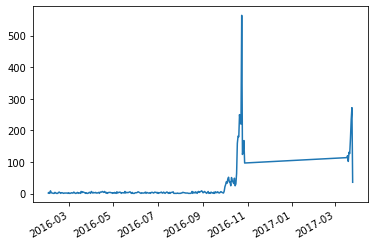

In [ ]:
df_day.plot()

데이터의 개수를 일자별 시계열 그래프로 나타냈다.

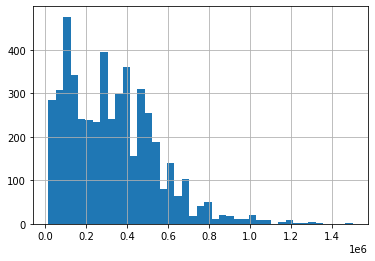

In [ ]:
df['price'].hist(bins='auto')

거래되고 있는 중고 폰들의 가격이 60만원(수치상 0.6) 이하 가격대를 형성하고 있다.

-동일 기종 내에서의 가격분포

phone_model을 groupby로 묶어 계산해보자.

In [ ]:
df_price_model_mean = df.groupby("phone_model")['price'].transform(lambda x:np.mean(x))

In [ ]:
df_price_model_std = df.groupby('phone_model')['price'].transform(lambda x:np.std(x))

z-score : 해당 값이(가격) 평균에 비해 어느정도 높거나 낮은 지를 알 수 있다.

z-score = 값 - 평균 / 표준 편차

In [ ]:
df_price_model_z_score = (df["price"]-df_price_model_mean)/df_price_model_std

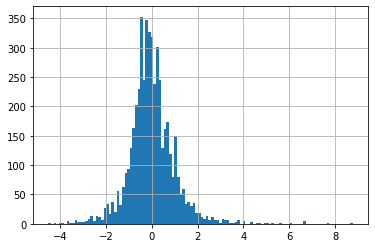

In [ ]:
df_price_model_z_score.hist(bins='auto')

동일 기종 내에서 price 피처의 분포가 정규분포를 따른다는 것을 알 수 있다.

factory_price의 분포 price와의 관계를 탐색

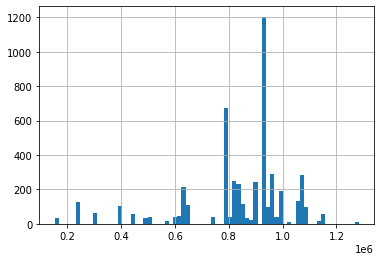

In [ ]:
df['factory_price'].hist(bins='auto')

출고가는 80~100만원 사이가 많다.

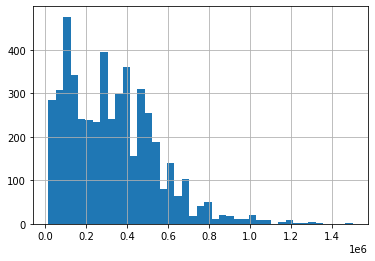

In [ ]:
df['price'].hist(bins='auto')

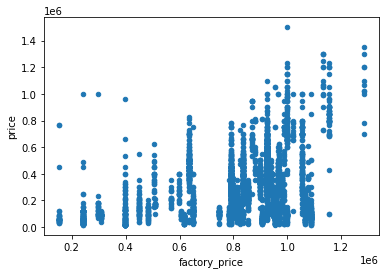

In [ ]:
df.plot.scatter(x='factory_price', y='price')

두 피쳐의 값들이 양의 상관관계를 가지고 있다.

'factory_price는 중고 가격에 중요한 영향을 미칠 것이다'라고 추정해 볼 수 있다.

-기종별 총 거래 갯수

In [ ]:
model_counts = df['phone_model'].value_counts()
print(model_counts)

iphone 6 64gb          1002
iphone 6 16gb           591
galaxy note3 32gb       231
iphone se 64gb          216
galaxy note5 32gb       167
                       ... 
iphone 6s Plus 16gb      12
iphone 7 plus 32gb       12
iphone 4s 16gb           11
iphone 7 plus 256gb      11
iphone 6 32gb            10
Name: phone_model, Length: 64, dtype: int64


In [ ]:
print(model_counts.describe())

count      64.000000
mean       77.359375
std       143.432786
min        10.000000
25%        23.000000
50%        35.000000
75%        90.500000
max      1002.000000
Name: phone_model, dtype: float64


{'boxes': [<matplotlib.lines.Line2D at 0x7f365eba2128>],
 'caps': [<matplotlib.lines.Line2D at 0x7f365eba2b38>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f365ebaf5f8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f365ebaf278>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f365eba2438>,
  <matplotlib.lines.Line2D at 0x7f365eba27b8>]}

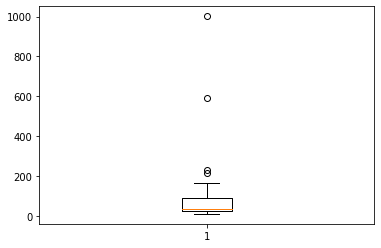

In [ ]:
plt.boxplot(model_counts)

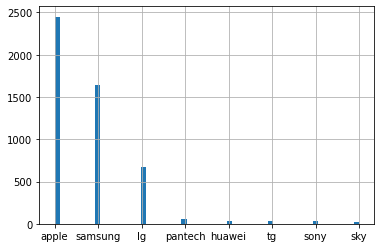

In [ ]:
df['maker'].hist(bins='auto')

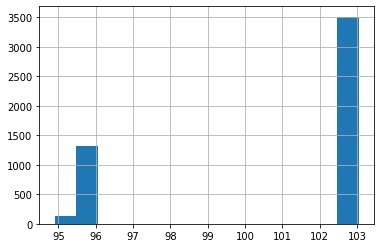

In [ ]:
df['price_index'].hist(bins='auto')

Text(0.5, 1.0, 'JeongminEom')

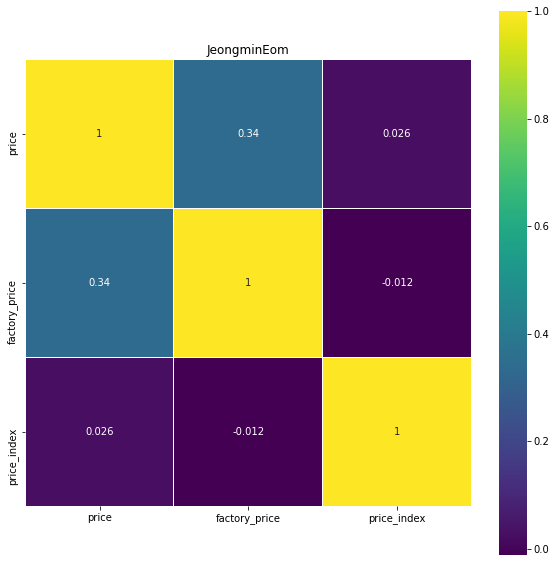

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),linewidths=0.01,square=True,
            annot=True,cmap=plt.cm.viridis, linecolor='white')
plt.title('JeongminEom')

**인공지능 분석하기**

-랜덤 포레스트 모델(Random Forest Model)-

의사결정나무(Decision Tree Model)모델을 응용한 것으로 의사결정나무를 여러개 모아 하나의 숲을 구성하는 방법. 하나의 모델이 정답을 푸는게 아니라 여러개의 모델이 정답을 함께 푸는 것이기 때문에 더 정확한 학습이 가능하다. 또한 모델이 생성되는 과정에서의 피처 중요도까지 계산하기 때문에 탐색적 분석 작업에서 아주 많이 사용되는 모델이다.
회귀, 분류 두가지에 모두 사용된다. 랜덤 포레스트 모델은 sklearn 라이브러리의 RandomForestRegressor 클래스로 사용한다.



데이터를 학습/테스트용으로 분리한다.

In [ ]:
df = df[['price','phone_model','factory_price','maker','price_index','month']]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

df = pd.read_csv("used_mobile_phone.csv")
print(df.info())
df.head()
df['month'] = df['create_date'].apply(lambda x: x[:7])


# 데이터를 학습/테스트용 데이터로 분리합니다.
df = df[['price', 'phone_model', 'factory_price', 'maker', 'price_index', 'month']]
df = pd.get_dummies(df, columns=['phone_model', 'maker', 'month'])
X = df.loc[:, df.columns != 'price']
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 랜덤 포레스트 모델을 학습합니다.
forest = RandomForestRegressor(n_estimators=1000,
                               criterion='mse')
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

# 학습한 모델을 평가합니다.
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4951 entries, 0 to 4950
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   create_date    4951 non-null   object 
 1   price          4951 non-null   float64
 2   text           4951 non-null   object 
 3   phone_model    4951 non-null   object 
 4   factory_price  4951 non-null   int64  
 5   maker          4951 non-null   object 
 6   price_index    4951 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 270.9+ KB
None
MSE train: 10627763605.049, test: 13847639418.500
R^2 train: 0.781, test: 0.683


피처 값들의 중요도를 분석한다.

<BarContainer object of 84 artists>

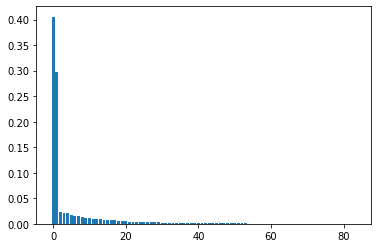

In [ ]:
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
plt.bar(range(X.shape[1]),importances[indices])

In [ ]:
feat_labels = X.columns.tolist()
feature = list(zip(feat_labels, forest.feature_importances_))
sorted(feature, key=lambda tup: tup[1], reverse=True)[:10]

[('factory_price', 0.405664172631774),
 ('maker_apple', 0.2975601498624609),
 ('phone_model_galaxy s3 3g 8gb', 0.022291452031126525),
 ('phone_model_iphone se 64gb', 0.021811192250813214),
 ('price_index', 0.020321197990707796),
 ('phone_model_galaxy s4 32gb', 0.016611395202650852),
 ('month_2017-03', 0.014864571292011769),
 ('maker_samsung', 0.014399384020327335),
 ('phone_model_galaxy s6 32gb', 0.01247957175529543),
 ('month_2016-05', 0.011030714374033088)]

피처의 값들 중에서 영향력이 높은 순으로 출력

In [ ]:
for sorted_feature in sorted(feature, key=lambda tup: tup[1], reverse=True):
  if 'month' in sorted_feature[0]:
    print(sorted_feature)

('month_2017-03', 0.014864571292011769)
('month_2016-05', 0.011030714374033088)
('month_2016-09', 0.008249117487427068)
('month_2016-04', 0.0076643548458689885)
('month_2016-10', 0.006333970286353752)
('month_2016-06', 0.004496597318118267)
('month_2016-08', 0.0036055681419139116)
('month_2016-07', 0.002677687291293633)
('month_2016-03', 0.002366801214420975)
('month_2016-02', 0.0010205610886368202)


**데이터 분석 결과 종합**

피처

date: 월 단위로 살펴본 결과 2016년 10월과 2017년 3월의 데이터가 가장 많다. 최근 가까운 달일 수록 중요한 피처다.

price: 전체 휴대폰의 거래가격과 달리 기종별 가격의 분포는 정규분포 형태를 띄고 있다. 

factory_price: price피처와 양의 상관관계를 가지고 있다. 중고 가격 형성에 있어서 가장 중요한 피처이다.

phone_model: 소수의 인기 기종이 많은 데이터를 가지고 있다.

maker: Apple 브랜드가 가장 많고 가격 예측에서도 Apple은 중요한 피쳐다.

price_index: 월별 변동은 크지 않고 그다지 중요한 피처가 아니다(물가는 가격 형성에 별로 영향을 미치지 않는다).

-데이터분석 개선

phone_model이 제품명 + 용량으로 구성되어 있어서 이를 나누면 2개의 분리된 피처를 얻을 수 있다.